All packages loaded successfully!

=== TSP Monte Carlo Simulation ===


Months until retirement: 162
Years until retirement: 13.5

=== SIMULATION RESULTS ===

Number of simulations: 10,000

Final Balance Statistics:
  Mean:           $1,392,688.58
  Median (50th):  $1,372,777.33
  10th percentile: $1,081,340.16
  25th percentile: $1,211,490.98
  75th percentile: $1,551,952.72
  90th percentile: $1,728,586.39


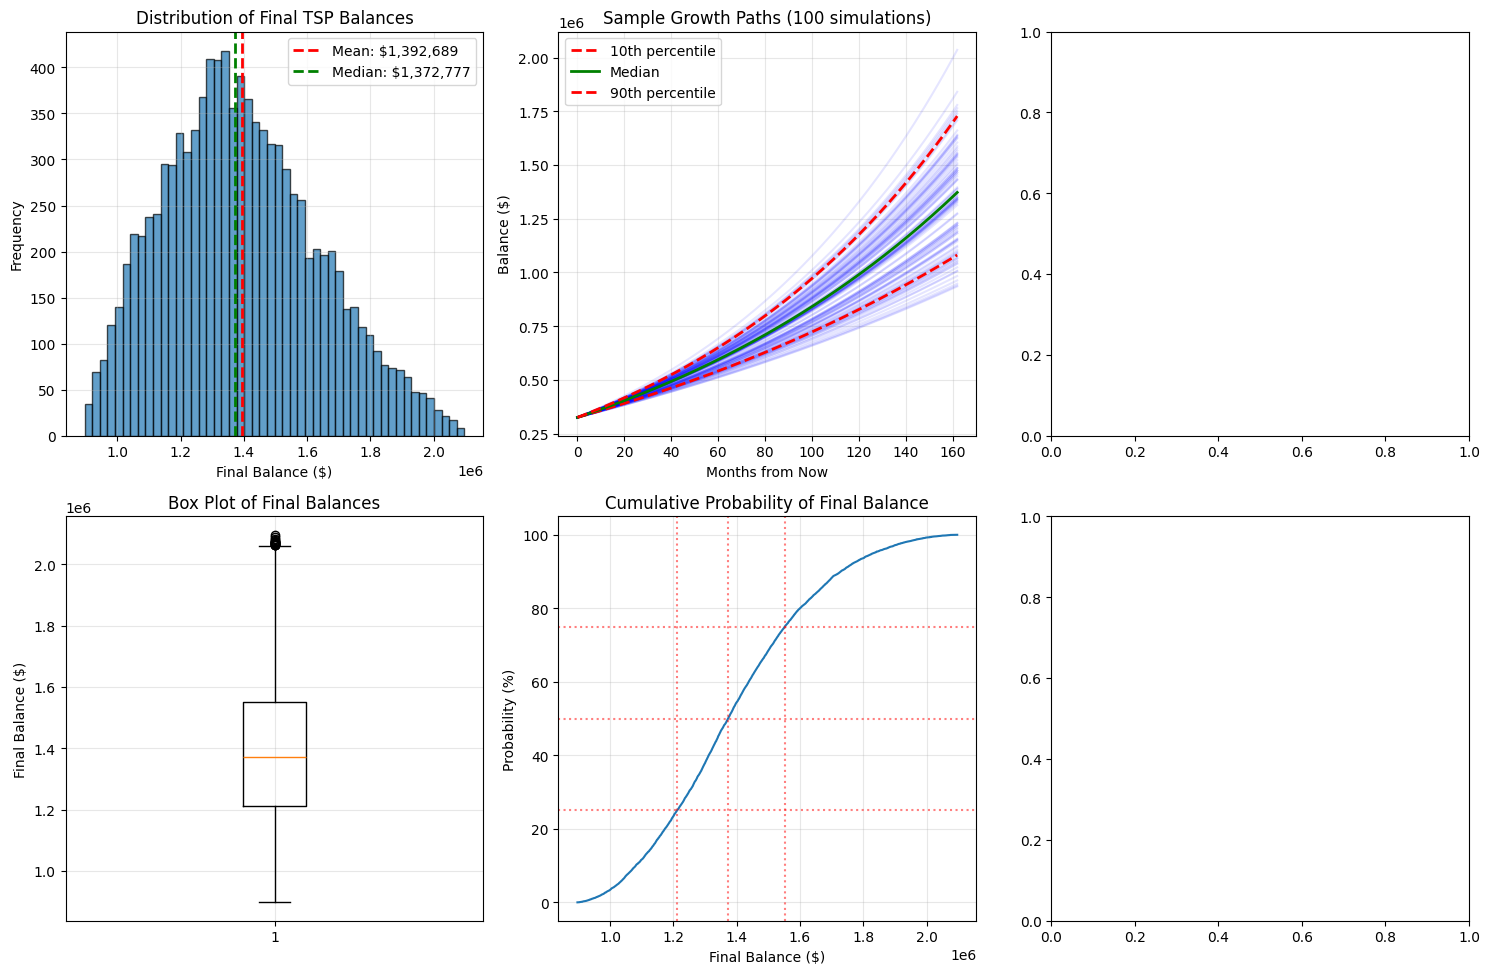


=== SUMMARY TABLE ===
   Percentile       Balance
         10th $1,081,340.16
         25th $1,211,490.98
50th (Median) $1,372,777.33
         75th $1,551,952.72
         90th $1,728,586.39
         Mean $1,392,688.58


In [26]:
# Install required packages if not already installed
import sys
import subprocess

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])

try:
    import matplotlib
except ImportError:
    print("Installing matplotlib...")
    install_package("matplotlib")
    import matplotlib

try:
    import numpy as np
except ImportError:
    print("Installing numpy...")
    install_package("numpy")
    import numpy as np

try:
    import pandas as pd
except ImportError:
    print("Installing pandas...")
    install_package("pandas")
    import pandas as pd

try:
    from dateutil.relativedelta import relativedelta
except ImportError:
    print("Installing python-dateutil...")
    install_package("python-dateutil")
    from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
from datetime import datetime

print("All packages loaded successfully!\n")

# Get user inputs
print("=== TSP Monte Carlo Simulation ===\n")

current_balance = float(input("Enter current TSP balance ($): "))
monthly_contribution = float(input("Enter monthly contribution ($): "))

retirement_month = int(input("Enter projected retirement month (1-12): "))
retirement_year = int(input("Enter projected retirement year (YYYY): "))

optimistic_return = float(input("Enter optimistic annual rate of return (%): ")) / 100
likely_return = float(input("Enter most likely annual rate of return (%): ")) / 100
pessimistic_return = float(input("Enter pessimistic annual rate of return (%): ")) / 100

# Calculate months until retirement
today = datetime.now()
retirement_date = datetime(retirement_year, retirement_month, 1)
months_to_retirement = (retirement_date.year - today.year) * 12 + (retirement_date.month - today.month)

if months_to_retirement <= 0:
    print("\nError: Retirement date must be in the future!")
else:
    print(f"\nMonths until retirement: {months_to_retirement}")
    print(f"Years until retirement: {months_to_retirement/12:.1f}\n")

    # Monte Carlo simulation parameters
    n_simulations = 10000
    
    # Sample one annual return per simulation (not per month)
    annual_returns_per_sim = np.random.triangular(
        pessimistic_return, 
        likely_return, 
        optimistic_return, 
        n_simulations
    )
# Convert to monthly returns and repeat for all months
    monthly_returns = np.tile(
        ((1 + annual_returns_per_sim) ** (1/12) - 1).reshape(-1, 1), 
        (1, months_to_retirement)
    )

# For visualization purposes, keep annual_returns as a repeated array
    annual_returns = np.tile(annual_returns_per_sim.reshape(-1, 1), (1, months_to_retirement))
    
    # Run simulations
    balances = np.zeros((n_simulations, months_to_retirement + 1))
    balances[:, 0] = current_balance
    
    for month in range(1, months_to_retirement + 1):
        balances[:, month] = (balances[:, month-1] * (1 + monthly_returns[:, month-1]) + 
                              monthly_contribution)
    months = np.arange(months_to_retirement + 1)

    # Extract final balances
    final_balances = balances[:, -1]
    months = np.arange(months_to_retirement + 1)
    
    # Calculate statistics
    percentiles = [10, 25, 50, 75, 90]
    results = {p: np.percentile(final_balances, p) for p in percentiles}
    mean_balance = np.mean(final_balances)
    
    # Display results
    print("=== SIMULATION RESULTS ===\n")
    print(f"Number of simulations: {n_simulations:,}")
    print(f"\nFinal Balance Statistics:")
    print(f"  Mean:           ${mean_balance:,.2f}")
    print(f"  Median (50th):  ${results[50]:,.2f}")
    print(f"  10th percentile: ${results[10]:,.2f}")
    print(f"  25th percentile: ${results[25]:,.2f}")
    print(f"  75th percentile: ${results[75]:,.2f}")
    print(f"  90th percentile: ${results[90]:,.2f}")

    # Display first 50 iterations' rates of return
    #print("\n=== RATES OF RETURN FOR FIRST 50 ITERATIONS ===\n")
    #for i in range(50):
    #    print(f"Iteration {i+1}:")
    #    avg_return = np.mean(annual_returns[i, :]) * 100
    #    min_return = np.min(annual_returns[i, :]) * 100
    #    max_return = np.max(annual_returns[i, :]) * 100
    #    print(f"  Average: {avg_return:.2f}% | Min: {min_return:.2f}% | Max: {max_return:.2f}%")
    #print()


    
    # Create visualizations
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # 1. Histogram of final balances
    axes[0, 0].hist(final_balances, bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(mean_balance, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_balance:,.0f}')
    axes[0, 0].axvline(results[50], color='green', linestyle='--', linewidth=2, label=f'Median: ${results[50]:,.0f}')
    axes[0, 0].set_xlabel('Final Balance ($)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of Final TSP Balances')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
 # 2. Rate of return paths for first 50 iterations
    #for i in range(50):
     #   axes[0, 1].plot(months[:-1], annual_returns[i, :] * 100, alpha=0.3, color='blue')
    
    #axes[0, 1].axhline(optimistic_return * 100, color='green', linestyle='--', linewidth=2, label=f'Optimistic: {optimistic_return*100:.1f}%')
    #axes[0, 1].axhline(likely_return * 100, color='orange', linestyle='--', linewidth=2, label=f'Most Likely: {likely_return*100:.1f}%')
    #axes[0, 1].axhline(pessimistic_return * 100, color='red', linestyle='--', linewidth=2, label=f'Pessimistic: {pessimistic_return*100:.1f}%')
    
    #axes[0, 1].set_xlabel('Months from Now')
    #axes[0, 1].set_ylabel('Annual Rate of Return (%)')
    #axes[0, 1].set_title('Rate of Return Paths (First 50 Simulations)')
    #axes[0, 1].legend()
    #axes[0, 1].grid(True, alpha=0.3)

    # 2. Sample paths
    sample_indices = np.random.choice(n_simulations, 100, replace=False)
    months = np.arange(months_to_retirement + 1)
    for idx in sample_indices:
        axes[0, 1].plot(months, balances[idx, :], alpha=0.1, color='blue')
    
    # Add percentile lines
    percentile_paths = np.percentile(balances, [10, 50, 90], axis=0)
    axes[0, 1].plot(months, percentile_paths[0, :], 'r--', linewidth=2, label='10th percentile')
    axes[0, 1].plot(months, percentile_paths[1, :], 'g-', linewidth=2, label='Median')
    axes[0, 1].plot(months, percentile_paths[2, :], 'r--', linewidth=2, label='90th percentile')
    
    axes[0, 1].set_xlabel('Months from Now')
    axes[0, 1].set_ylabel('Balance ($)')
    axes[0, 1].set_title('Sample Growth Paths (100 simulations)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Box plot of outcomes
    axes[1, 0].boxplot(final_balances, vert=True)
    axes[1, 0].set_ylabel('Final Balance ($)')
    axes[1, 0].set_title('Box Plot of Final Balances')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Cumulative probability
    sorted_balances = np.sort(final_balances)
    cumulative_prob = np.arange(1, n_simulations + 1) / n_simulations
    axes[1, 1].plot(sorted_balances, cumulative_prob * 100)
    axes[1, 1].set_xlabel('Final Balance ($)')
    axes[1, 1].set_ylabel('Probability (%)')
    axes[1, 1].set_title('Cumulative Probability of Final Balance')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add reference lines for key percentiles
    for p in [25, 50, 75]:
        axes[1, 1].axhline(p, color='red', linestyle=':', alpha=0.5)
        axes[1, 1].axvline(results[p], color='red', linestyle=':', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
# 6. Distribution of returns used in simulations
    #all_returns = annual_returns.flatten() * 100
    #axes[1, 2].hist(all_returns, bins=50, edgecolor='black', alpha=0.7)
    #axes[1, 2].axvline(optimistic_return * 100, color='green', linestyle='--', linewidth=2, label=f'Optimistic: {optimistic_return*100:.1f}%')
    #axes[1, 2].axvline(likely_return * 100, color='orange', linestyle='--', linewidth=2, label=f'Most Likely: {likely_return*100:.1f}%')
    #axes[1, 2].axvline(pessimistic_return * 100, color='red', linestyle='--', linewidth=2, label=f'Pessimistic: {pessimistic_return*100:.1f}%')
    #axes[1, 2].set_xlabel('Annual Rate of Return (%)')
    #axes[1, 2].set_ylabel('Frequency')
    #axes[1, 2].set_title('Distribution of Returns Used in All Simulations')
    #axes[1, 2].legend()
    #axes[1, 2].grid(True, alpha=0.3)
    
    #plt.tight_layout()
    #plt.show()

    # Create summary DataFrame
    summary_df = pd.DataFrame({
        'Percentile': ['10th', '25th', '50th (Median)', '75th', '90th', 'Mean'],
        'Balance': [results[10], results[25], results[50], results[75], results[90], mean_balance]
    })
    summary_df['Balance'] = summary_df['Balance'].apply(lambda x: f"${x:,.2f}")
    
    print("\n=== SUMMARY TABLE ===")
    print(summary_df.to_string(index=False))